# Importing Basic Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

# Loading Dataset

In [2]:
adult_df=pd.read_csv(r'C:\Users\Mihir\Desktop\DATASETS\Adult dataset\adult_data.csv',header=None,delimiter=' *, *')

#delimiter used to remove all gaps and spaces and then save the dataframe

In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.shape

(32561, 15)

In [5]:
#assigning column headers to dataframe
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#create a copy of the dataFrame
adult_df_rev=pd.DataFrame.copy(adult_df)

In [7]:
#dropping fnlwgt as it is irelevant domain-wise and education as there is another variable "education_num" same as "education"
adult_df_rev=adult_df_rev.drop(["education","fnlwgt"],axis=1)

In [8]:
adult_df_rev.shape

(32561, 13)

# Handling the Missing Values

In [9]:
adult_df_rev.isnull().sum() #no null data in 'na' form

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
adult_df_rev=adult_df_rev.replace(['?'], np.nan)

In [11]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [12]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

# Note-
mode is the central tendency which can be applied to categorical variable

In [13]:
#replace the missing values with the mode values

for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [14]:
adult_df_rev.workclass.mode()[0]   #0 for single-mode

'Private'

In [15]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [16]:

"""
for x in adult_df_rev.columns[:]:
  if adult_df_rev[x].dtype=='object':
     adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
  elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
     adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""

#generic code to fill values based on datatype.

"\nfor x in adult_df_rev.columns[:]:\n  if adult_df_rev[x].dtype=='object':\n     adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n  elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n     adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)\n"

# Converting Categorical to Numerical

# Note-
SKLEARN does not accept categorical data,so we need to convert it into numeric.

In [17]:
#IDENTIFYING DATATYPES AS 'OBJECT' AND APPEND IT IN A NEW VARIABLE COLNAME[]

colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [18]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
    #le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    #print('Feature', x)
    #print('mapping', le_name_mapping)

#last three lines to view which level got which number assigned.

In [19]:
adult_df_rev.head()

#0--> <=50k
#1--> =50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [20]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [21]:
#seperate dependent and independent variables

X=adult_df_rev.values[:,:-1]
Y=adult_df_rev.values[:,-1]

# scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

scalar.fit(X)   #FIT WILL TRAIN THE SCALAR OBJECT AND DECIDE UPN NEW RANGES TO BE APPLIED,

X=scalar.transform(X) 
#TRANSFORM WILL SEEK THE RANGES FROM THE SCALAR OBJECT WHICH WAS LEARNT,AND TRANSFORM THE ORIGINAL VALUES WITH SCALED VALUES.

print(X)


#x has now changed into float datatype.we need to convert y too into integer.

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [23]:
#CONVERTING Y INTO int Datatype.

Y=Y.astype(int)

# RUNNING A BASIC MODEL

# train-test split

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# training and testing

In [25]:
from sklearn.linear_model import LogisticRegression
#creating a model
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# predict the model

In [26]:

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))



# displaying the coeffiicient and intercept

In [27]:
#displaying the coefficnet and intercept
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.47914235 -0.10451762  0.86310829 -0.34832939 -0.01659932 -0.18082614
   0.11572266  0.4281952   2.42686909  0.28596836  0.37954959  0.00881801]]
[-1.50218566]


# displaing confusion matrix and other metrics


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print("CONFUSION MATRIX: ")
print(cfm)

print('Classification Report: ')

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

CONFUSION MATRIX: 
[[7017  406]
 [1316 1030]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8237281195618794


# adjusting the threshold
here,we are basically changing teh threshold from 0.5 to 0.45 manually.

In [29]:
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.96864499 0.03135501]
 [0.97033947 0.02966053]
 [0.23875257 0.76124743]
 ...
 [0.81409863 0.18590137]
 [0.82534471 0.17465529]
 [0.15672829 0.84327171]]


In [30]:
#appending the values in probability matrix to 0 and 1
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print("CONFUSION MATRIX: ")
print(cfm)

print('Classification Report: ')

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

CONFUSION MATRIX: 
[[6910  513]
 [1208 1138]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8238304841846658


In [32]:
for a in np.arange(0.4,0.61,0.01):    #arange(include,exclude,steps)
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)  
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  #error=type1 error+type2 error
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
                cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.41000000000000003 : 1747  , type 2 error : 1096  , type 1 error: 651
Errors at threshold  0.42000000000000004 : 1749  , type 2 error : 1115  , type 1 error: 634
Errors at threshold  0.43000000000000005 : 1760  , type 2 error : 1144  , type 1 error: 616
Errors at threshold  0.44000000000000006 : 1752  , type 2 error : 1168  , type 1 error: 584
Errors at threshold  0.45000000000000007 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.4600000000000001 : 1721  , type 2 error : 1208  , type 1 error: 513
Errors at threshold  0.4700000000000001 : 1718  , type 2 error : 1233  , type 1 error: 485
Errors at threshold  0.4800000000000001 : 1727  , type 2 error : 1268  , type 1 error: 459
Errors at threshold  0.4900000000000001 : 1722  , type 2 error : 1295  , type 1 error: 427
Errors at threshold  0.5000000000000001 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at

In [33]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)
print(auc)

0.8510163280208206


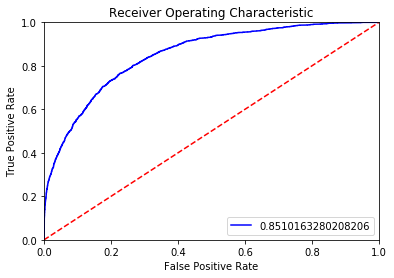

In [34]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [35]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)

0.7079857322331378


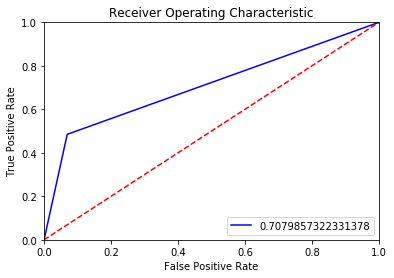

In [36]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Note-
whEn we are confused between multiple thresholds,we can ind out AUC values for each of those thresholds and finally conclude upon that threshold value which gives us an AUC nearest to overall AUC.

In [37]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10)     #n_splits=value of K.
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=10, random_state=10, shuffle=False)
[0.81842105 0.81403509 0.81790259 0.85037297 0.8293111  0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240178825739205


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print("CONFUSION MATRIX: ")
print(cfm)
print()
print('Classification Report: ')

print(classification_report(Y_test,Y_pred))
print()
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

CONFUSION MATRIX: 
[[7016  407]
 [1315 1031]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769


Accuracy of the model:  0.8237281195618794


# Testing data-

In [39]:
test_df=pd.read_csv(r'C:\Users\Mihir\Desktop\DATASETS\Adult dataset\adult_test.csv',header=None,delimiter=' *, *')

test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [40]:
#assigning column headers to dataframe
test_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']


In [41]:
#dropping fnlwgt as it is irelevant domain-wise and education as there is another variable "education_num" same as "education"
test_df=test_df.drop(["education","fnlwgt"],axis=1)
test_df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [42]:
test_df.isnull().sum() #no null data in 'na' form

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [43]:
#replacing the missing values denoted by "?" with NA
test_df=test_df.replace(['?'], np.nan)

In [44]:
test_df.isnull().sum() #checking NAs

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [45]:
test_df.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [46]:
#replace the missing values with the mode values

for value in ['workclass','occupation','native_country']:
    test_df[value].fillna(test_df[value].mode()[0],inplace=True)

In [47]:
test_df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [48]:
#IDENTIFYING DATATYPES AS 'OBJECT' AND APPEND IT IN A NEW VARIABLE COLNAME[]

colname=[]
for x in test_df.columns:
    if test_df[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [49]:
# For converting categorical to numeric data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    test_df[x]=le.fit_transform(test_df[x])

In [50]:
test_df.head()

#0--> <=50k
#1--> =50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,9,3,4,0,0,0,30,37,0


In [51]:
test_df.dtypes #data converted into into numeric form



age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [52]:
#seperate dependent and independent variables

X_test_new=test_df.values[:,:-1]
Y_test_new=test_df.values[:,-1]

# SCALING THE DATA

In [53]:

X_test_new=scalar.transform(X_test_new) 

# Prediction using trained model

In [54]:
y_pred_prob=classifier.predict_proba(X_test_new)
print(y_pred_prob)

[[0.97856006 0.02143994]
 [0.79066424 0.20933576]
 [0.69523615 0.30476385]
 ...
 [0.50514381 0.49485619]
 [0.19172259 0.80827741]
 [0.47101263 0.52898737]]


# Adjusting the threshold

In [55]:
#appending the values in probability matrix to 0 and 1
y_pred_new=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
print(y_pred_new)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test_new,y_pred_new)
print("CONFUSION MATRIX: ")
print(cfm)

print('Classification Report: ')

print(classification_report(Y_test_new,y_pred_new))

acc=accuracy_score(Y_test_new,y_pred_new)
print("Accuracy of the model: ",acc)

CONFUSION MATRIX: 
[[11526   909]
 [ 1964  1882]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.67      0.49      0.57      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.71      0.73     16281
weighted avg       0.81      0.82      0.81     16281

Accuracy of the model:  0.823536637798661


In [57]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test_new,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)
print(auc)

0.8513328172853493


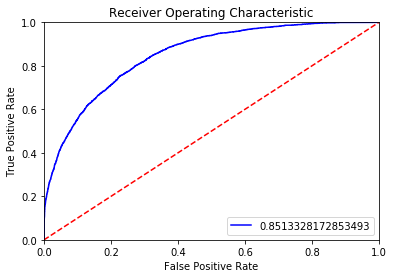

In [58]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()